<a href="https://colab.research.google.com/github/venkateshneu/CAT-vs-DOG-deep-learning-project-/blob/main/CAT_VS_DOG_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', "r")
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

In [ ]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
# Define the process function for normalization
def process(image, label):
    image = tf.cast(image / 255., tf.float32)  # Normalize the image
    return image, label

# Map the process function to normalize both the training and validation datasets
train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [ ]:
# CNN MODEL

In [ ]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), padding='valid', activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

model.add(Conv2D(64, kernel_size=(3, 3), padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

model.add(Conv2D(128, kernel_size=(3, 3), padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 30, 30, 128)      

In [ ]:
model.compile(optimizer ='adam', loss = "binary_crossentropy", metrics = ["accuracy"])

In [ ]:
model.fit(train_ds, epochs = 5, validation_data = validation_ds)

Epoch 1/5
625/625 [==============================] - 56s 84ms/step - loss: 0.6333 - accuracy: 0.6407 - val_loss: 0.5568 - val_accuracy: 0.7278
Epoch 2/5
625/625 [==============================] - 56s 89ms/step - loss: 0.5123 - accuracy: 0.7462 - val_loss: 0.4773 - val_accuracy: 0.7746
Epoch 3/5
625/625 [==============================] - 55s 88ms/step - loss: 0.4012 - accuracy: 0.8163 - val_loss: 0.4674 - val_accuracy: 0.7882
Epoch 4/5
625/625 [==============================] - 65s 103ms/step - loss: 0.2743 - accuracy: 0.8834 - val_loss: 0.5481 - val_accuracy: 0.7850
Epoch 5/5
625/625 [==============================] - 57s 91ms/step - loss: 0.1620 - accuracy: 0.9359 - val_loss: 0.9219 - val_accuracy: 0.7664


In [ ]:
import cv2
import matplotlib.pyplot as plt
test_dog = cv2.imread("/content/1_2M1YzdF1QhqU_OMEQCE04w.png")

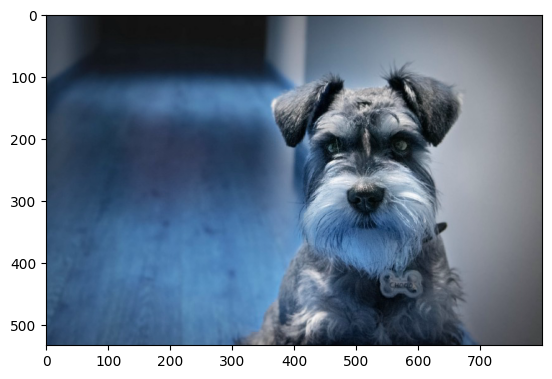

In [ ]:
plt.imshow(test_dog)

In [ ]:
test_dog.shape

(533, 800, 3)

In [ ]:
test_dog = cv2.resize(test_dog, (256, 256))

In [ ]:
test_dog_img = test_dog.reshape((1,256, 256,3))

In [ ]:
model.predict(test_dog_img)

1/1 [==============================] - 1s 603ms/step


array([[1.]], dtype=float32)